**Business Objective**

Predicting a qualitative response for observation can be referred to as classifying that observation since it involves assigning the observation to a category or class. Classification forms the basis for Logistic Regression. Logistic Regression is a supervised algorithm used to predict a dependent variable that is categorical or discrete. Logistic regression models the data using the sigmoid function.

Churned Customers are those who have decided to end their relationship with their existing company. In our case study, we will be working on a churn dataset. XYZ is a service-providing company that provides customers with a one-year subscription plan for their product. The company wants to know if the customers will renew the subscription for the coming year or not.

**Data Description**
The CSV consists of around 2000 rows and 16 columns

Features:
1. Year
2. Customer_id - unique id
3. Phone_no - customer phone no
4. Gender -Male/Female
5. Age
6. No of days subscribed - the number of days since the subscription
7. Multi-screen - does the customer have a single/ multiple screen subscription
8. Mail subscription - customer receive mails or not
9. Weekly mins watched - number of minutes watched weekly
10.Minimum daily mins - minimum minutes watched
11.Maximum daily mins - maximum minutes watched
12.Weekly nights max mins - number of minutes watched at night time
13.Videos watched - total number of videos watched
14.Maximum_days_inactive - days since inactive
15.Customer support calls - number of customer support calls
16.Churn -
● 1- Yes
● 0 - No


**Aim**
Build a logistics regression learning model on the given dataset to determine whether the customer will churn or not.

**Content or Approach for this project**
Approach
1. Importing the required libraries and reading the dataset.
2. Inspecting and cleaning up the data
3. Perform data encoding on categorical variables
4. Exploratory Data Analysis (EDA)
   - Data Visualization
5. Feature Engineering
   - Dropping of unwanted columns
6. Model Building
   - Using the statsmodel library
7. Model Building
   - Performing train test split
   - Logistic Regression Model
8. Model Validation (predictions)
   - Accuracy score
   - Confusion matrix
   - ROC and AUC
   - Recall score
   - Precision score
   - F1-score
9. Handling the unbalanced data
   - With balanced weights
   - Random weights
   - Adjusting imbalanced data
   - Using SMOTE
10.Feature Selection
   - Barrier threshold selection
   - RFE method

**Loading the dataset**

In [ ]:
import pandas as pd
df=pd.read_csv('C:/Users/shubh/data_regression.csv')

Mounted at /content/drive


In [ ]:
df.head(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,NaN,31,65,no,no,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,NaN,54,59,no,no,239.25,10.2,27.12,106,4,NaN,0,0.0
7,2015,103225,348-7193,Female,40,50,no,no,196.65,5.6,22.29,88,9,NaN,5,1.0
8,2015,103408,413-4039,Male,61,205,no,yes,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,Male,31,63,no,no,316.80,12.3,35.90,58,2,4.0,0,0.0


**Inspecting and cleaning up the frame**

In [ ]:
def inspection(dataframe):
  import pandas as pd
  import seaborn as sns
  print("Types of the variables we are working with:")
  print(dataframe.dtypes)
  
  print("Total Samples with missing values:")

  print(df.isnull().any(axis=1).sum())

  print("Total Missing Values per Variable")
  print(df.isnull().sum())
  print("Map of missing values")
  sns.heatmap(dataframe.isnull())

Types of the variables we are working with:
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
Total Samples with missing values:
82
Total Missing Values per Variable
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_

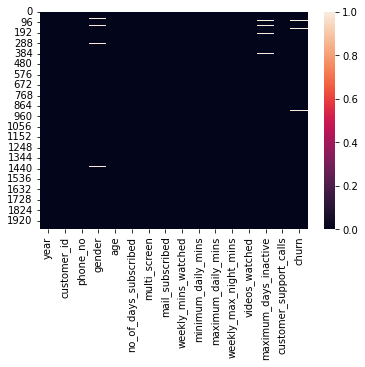

In [ ]:
inspection(df)

In [ ]:
df = df.dropna() # cleaning up null values

**Encoding categorical variables**

In [ ]:
df.head(5)

df.multi_screen.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
def encode_categories (df,variables):
  from sklearn.preprocessing import OrdinalEncoder
  ord_enc = OrdinalEncoder()
  for v in variables:
    name = v+'_code'
    df[name] = ord_enc.fit_transform(df[[v]])
    print('The encoded values for '+ v + ' are:')
    print(df[name].unique())

In [ ]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0


In [ ]:
encode_categories (df,['gender','multi_screen','mail_subscribed'])

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


**Do some data visualizations**

In [ ]:
def plot_scatterplots (df,cols_to_exclude,class_col):
  #this function returns scatterplots of all the variables in the dataset
  #against the classification variable,
  #for a quick data visualization
  import numpy as np
  import seaborn as sns
  import warnings
  warnings.filterwarnings("ignore")
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  for col in X.columns.difference([class_col]):
    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, col, class_col)

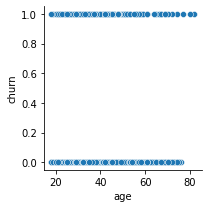

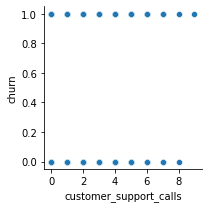

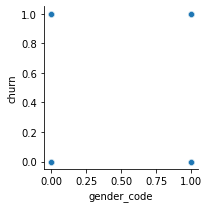

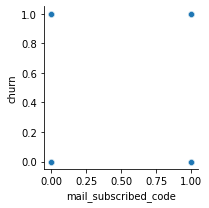

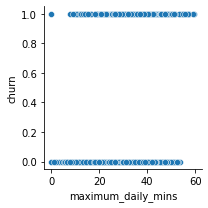

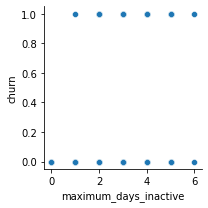

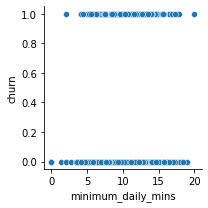

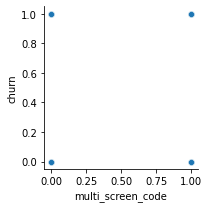

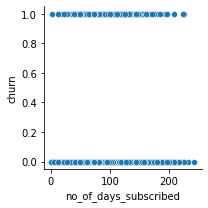

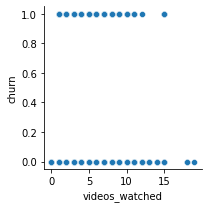

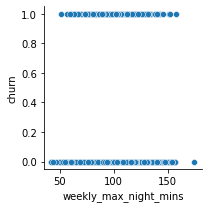

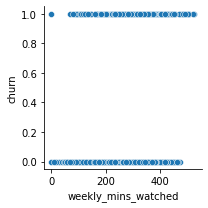

In [ ]:
plot_scatterplots (df,['customer_id','phone_no', 'year'],'churn')

In [ ]:
def full_diagnostic(df,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df,hue = class_col)

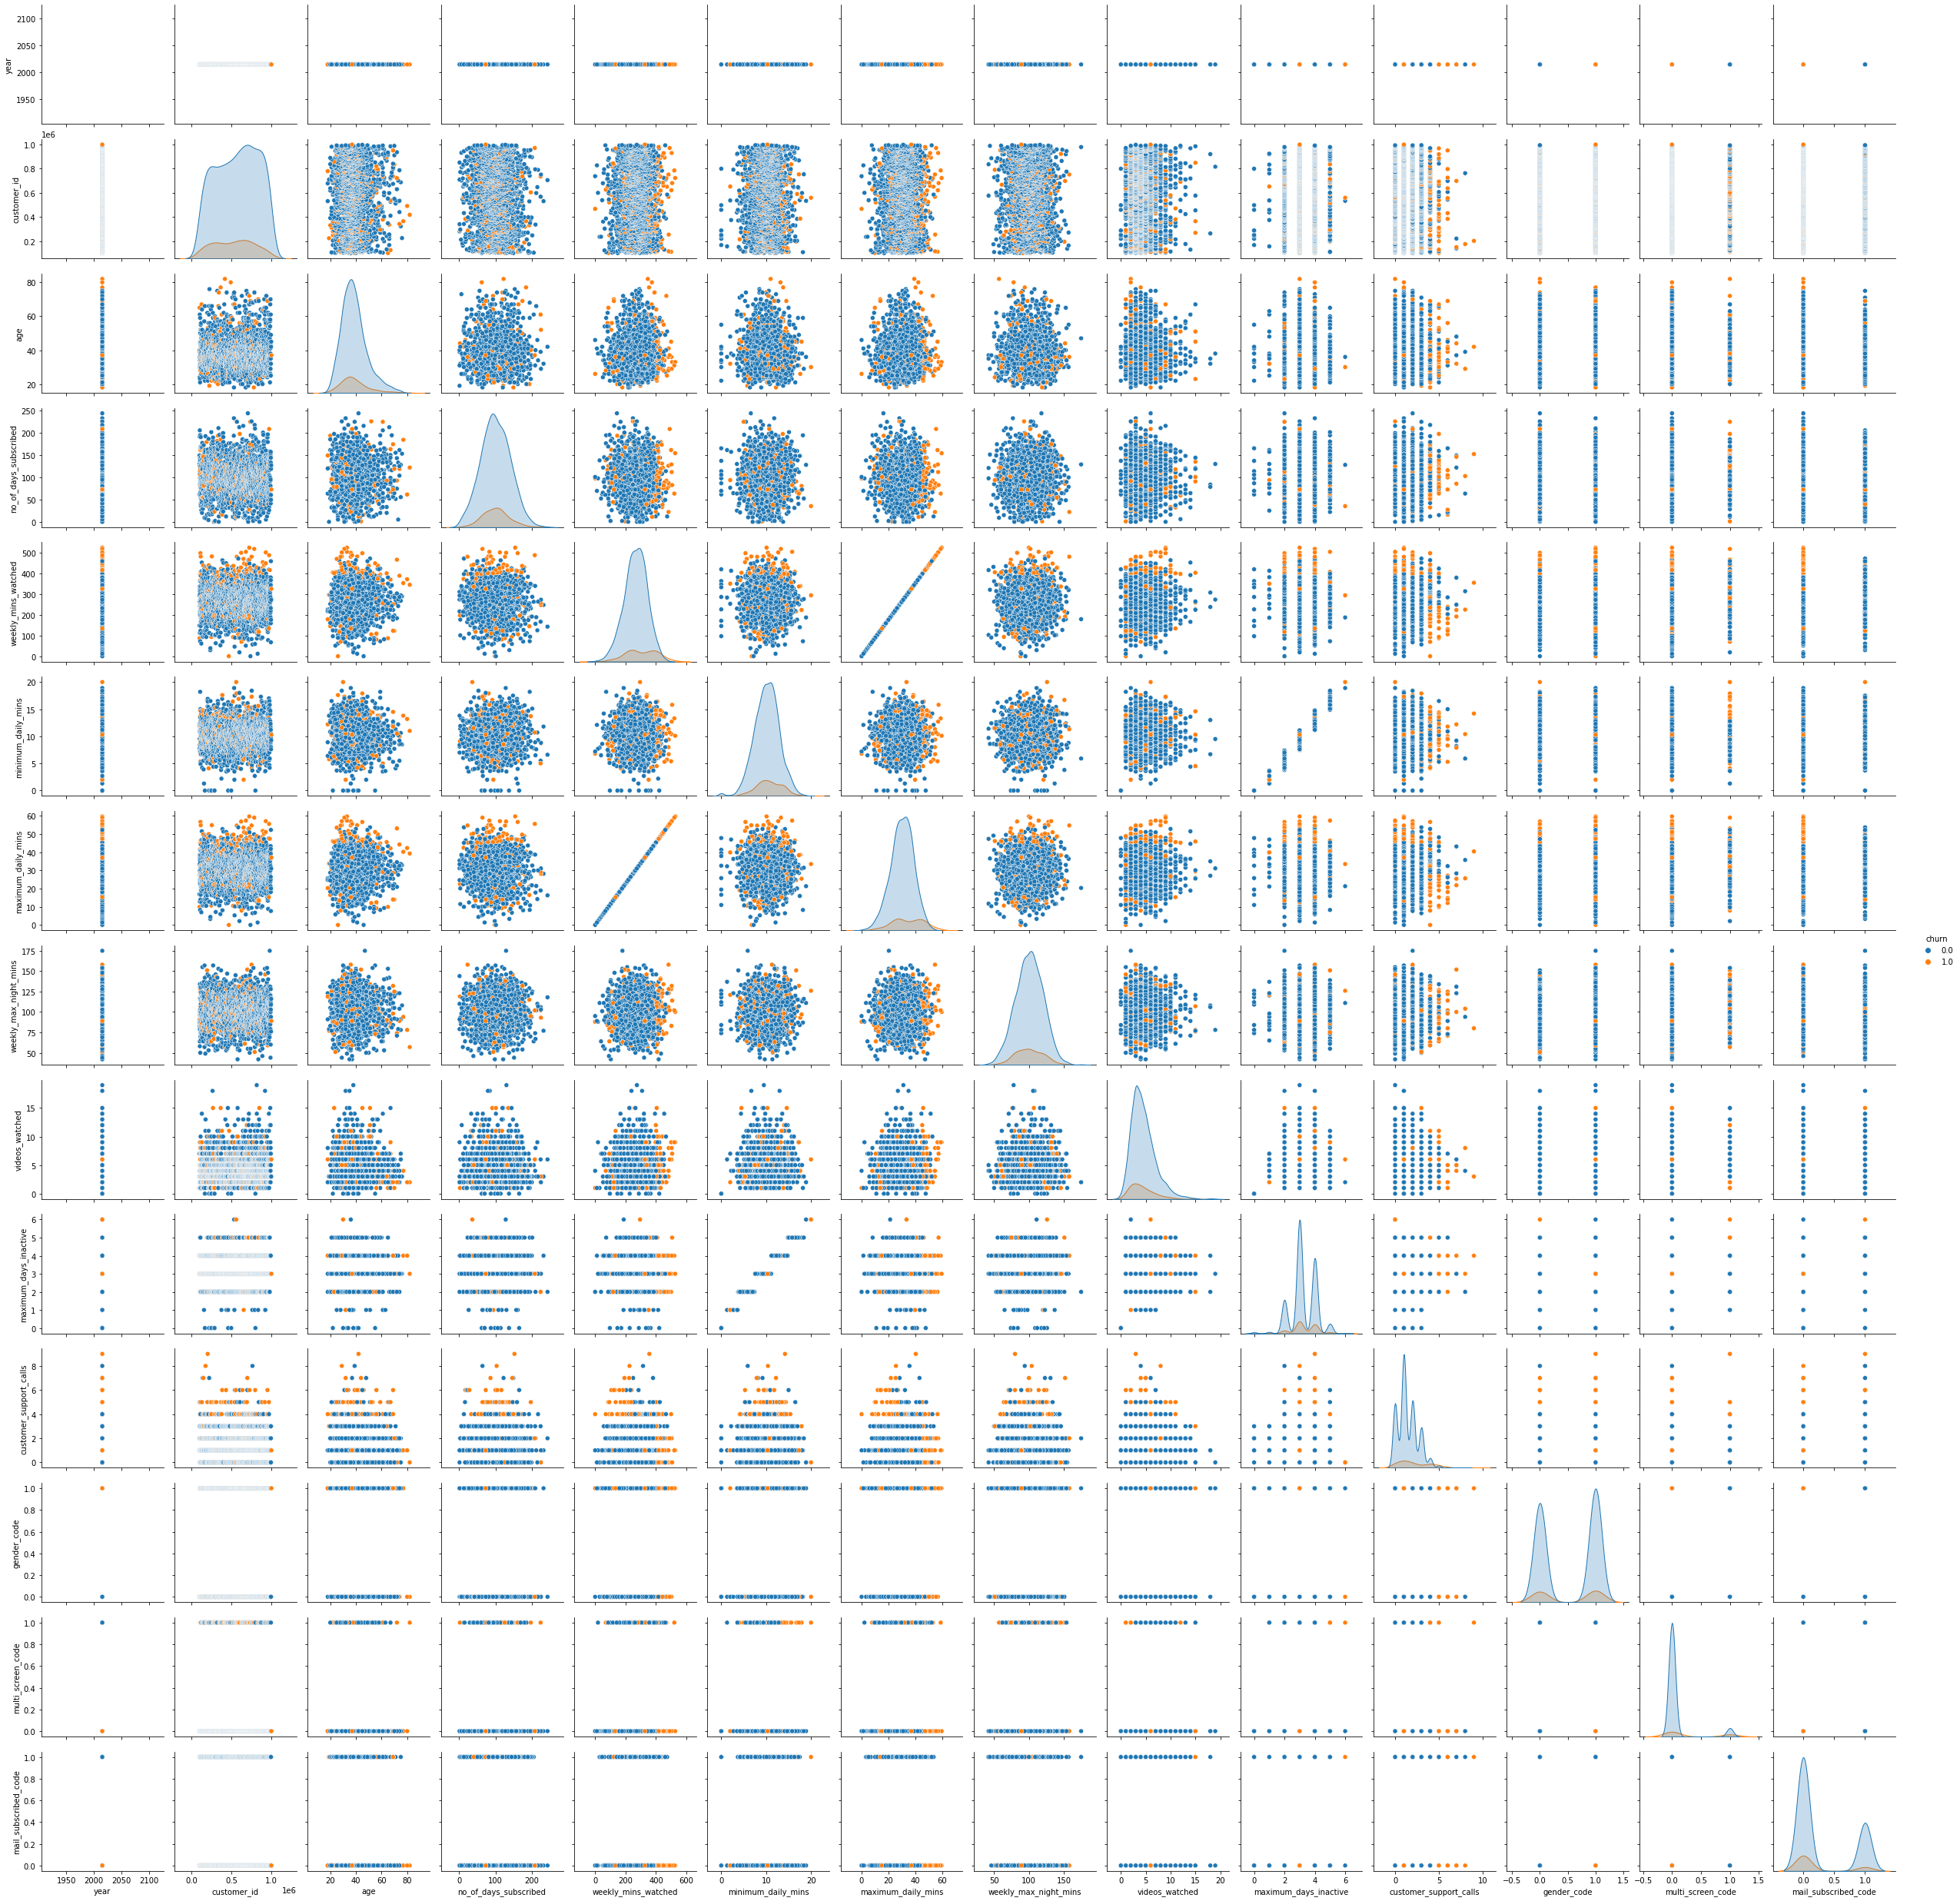

In [ ]:
full_diagnostic(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
def selected_diagnotic(df,class_col,cols_to_eval):
  import seaborn as sns
  cols_to_eval.append(class_col)
  X = df[cols_to_eval]
  sns.pairplot(X,hue = class_col)

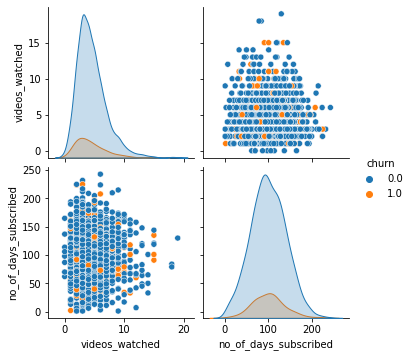

In [ ]:
selected_diagnotic(df,class_col = 'churn',cols_to_eval = ['videos_watched','no_of_days_subscribed'])

**Run the logistic regression**

In [ ]:
def logistic_regression(df,class_col,cols_to_exclude):
  import statsmodels.api as sm
  import numpy as np
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]

  ## Scaling variables
  ##from sklearn import preprocessing
  ##scaler = preprocessing.StandardScaler().fit(X)
  ##X_scaled = scaler.transform(X)


  #X_Scale = scaler.transform(X)
  y=df[class_col]
  logit_model=sm.Logit(y,X)
  result=logit_model.fit()
  print(result.summary2())

In [ ]:
logistic_regression(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2021-11-10 11:14   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [ ]:
import math
math.exp(1.9511)


7.036423390843554

**Run the ML Model**

In [ ]:
def prepare_model(df,class_col,cols_to_exclude):
## Split in training and test set
  from sklearn.model_selection import train_test_split
  import numpy as np
  ##Selecting only the numerical columns and excluding the columns we specified in the function
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  ##Selecting y as a column
  y=df[class_col]
  global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test)
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%logit_roc_auc)
    

In [ ]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


In [ ]:
def confusion_matrix(y_test,y_pred):
  from sklearn.metrics import confusion_matrix
  confusion_matrix = confusion_matrix(y_test, y_pred)
  print(confusion_matrix)

  tn, fp, fn, tp = confusion_matrix.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)

In [ ]:
def roc_curve (logreg,X_test,y_test):
  import matplotlib.pyplot as plt 
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, logreg.predict(X_test))
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

In [ ]:
prepare_model(df,class_col='churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [ ]:
confusion_matrix(y_test,y_pred)

[[504   9]
 [ 55   8]]
TN: 504.00
TP: 8.00
FP: 9.00
FN: 55.00


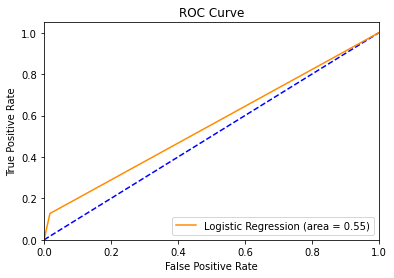

In [ ]:
roc_curve (logreg,X_test,y_test)

**Saving & Running the Model**

In [ ]:
import pickle
pickle.dump(logreg, open('model1.pkl', 'wb'))

In [ ]:
model = pickle.load(open('model1.pkl', 'rb'))

In [ ]:
model.predict(X_test)

array([1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

**Dealing with Class Imbalance**

In [ ]:
df['churn'].describe()

count    1918.000000
mean        0.131908
std         0.338479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

In [ ]:
def run_model_bweights(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight = 'balanced')
    logreg.fit(X_train, y_train)
    global y_pred
    y_pred = logreg.predict(X_test)
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)

In [ ]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.75      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is: 0.76


In [ ]:
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w)
    logreg.fit(X_train, y_train)
    global y_pred
    y_pred = logreg.predict(X_test)
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)

In [ ]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:90, 1:10})

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       513
         1.0       1.00      0.02      0.03        63

    accuracy                           0.89       576
   macro avg       0.95      0.51      0.49       576
weighted avg       0.90      0.89      0.84       576

The area under the curve is: 0.51


In [ ]:
def adjust_imbalance (X_train,y_train,class_col):
  from sklearn.utils import resample
  import pandas as pd
  X = pd.concat([X_train, y_train], axis=1)

  # separate the 2 classes
  class0 = X[X[class_col]==0]
  class1 = X[X[class_col]==1]

  # Case 1 - bootstraps from the minority class
  if len(class1)<len(class0):
    resampled = resample(class1,
                              replace=True, 
                              n_samples=len(class0), 
                              random_state=10) 
    resampled_df = pd.concat([resampled, class0])

  # Case 1 - ressamples from the majority class
  else:
    resampled = resample(class1,
                              replace=False, 
                              n_samples=len(class0), 
                              random_state=10) 
    resampled_df = pd.concat([resampled, class0])

  return resampled_df

In [ ]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'churn')

In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.67      0.75      0.71       339
         1.0       0.73      0.65      0.69       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


In [ ]:
def prepare_model_smote(df,class_col,cols_to_exclude):
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, ratio=1.0)
  X_train, y_train = sm.fit_sample(X_train, y_train) 

In [ ]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85       513
         1.0       0.28      0.75      0.41        63

    accuracy                           0.76       576
   macro avg       0.62      0.76      0.63       576
weighted avg       0.89      0.76      0.80       576

The area under the curve is: 0.76


**Predictions**

In [ ]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80       513
         1.0       0.20      0.63      0.31        63

    accuracy                           0.68       576
   macro avg       0.57      0.66      0.55       576
weighted avg       0.86      0.68      0.74       576

The area under the curve is: 0.66


**Feature selection**

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [ ]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
  from sklearn.feature_selection import VarianceThreshold
  import numpy as np
  from sklearn import preprocessing

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  ## Scaling variables
  scaler = preprocessing.StandardScaler().fit(X)
  X_scaled = scaler.transform(X)
  var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
  var_thr.fit(X_scaled)
  var_thr.get_support()

  global selected_cols
  selected_cols = X.columns[var_thr.get_support()]

  print("The selected features are: ")
  print(list(selected_cols))

In [ ]:
var_threshold_selection(df,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=1)

The selected features are: 
['maximum_daily_mins', 'maximum_days_inactive', 'weekly_mins_watched']


In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 'minimum_daily_mins', 
                                                                'weekly_max_night_mins', 'videos_watched', 
                                                                'customer_support_calls', 'churn', 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.59       339
         1.0       0.60      0.55      0.57       353

    accuracy                           0.58       692
   macro avg       0.58      0.58      0.58       692
weighted avg       0.59      0.58      0.58       692

The area under the curve is: 0.58


**Recursive Feature Elimination**

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [ ]:
def rfe_selection(df,cols_to_exclude,class_col,model):
  import warnings
  warnings.filterwarnings("ignore")
  import numpy as np1
  from sklearn.feature_selection import RFE

  cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  y = df[class_col]

  rfe = RFE(model)
  rfe = rfe.fit(X, y)
  global selected_cols
  selected_cols = X.columns[rfe.support_]

  print("The selected features are: ")
  print(list(selected_cols))


In [ ]:
rfe_selection(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

The selected features are: 
['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code']


In [ ]:
prepare_model(resampled_df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year',
                                                                'gender', 'age',
                                                                'no_of_days_subscribed', 'multi_screen', 'mail_subscribed', 
                                                                'weekly_max_night_mins', 
                                                                 'gender_code', 'multi_screen_code',
                                                                'mail_subscribed_code'])
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       339
         1.0       0.71      0.69      0.70       353

    accuracy                           0.70       692
   macro avg       0.70      0.70      0.70       692
weighted avg       0.70      0.70      0.70       692

The area under the curve is: 0.70


As we can see, we have after using RFE we have an area under curve 0.70 and precsion of 0.71 and recall of 0.69. This is very similar to what we had before with the advantage that we are leaving behind a bunch of features that were not very important as far as this metrics goes. So we're going to be able to run this model with a lower computational cost.